In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import mnist      #MNIST is a database of hand-written digits of 70,000 various samples.
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical as tcg    #Using 1 hot encoding to convert a number into a vector of 0s and 1s 
from keras.models import Sequential    # Importing model for building a neural network
from keras.layers import Dense        #For adding layers into the network

Using TensorFlow backend.


In [0]:
(xtr, ytr), (xte, yte) = mnist.load_data()    #xtr -> Image of training data
#ytr -> Label of image
# Similarly, xte, yte -> Testing data image and label resp.

In [4]:
xtr.shape     #28, 28 gives pixel height and pixel width resp.

(60000, 28, 28)

In [5]:
xtr[0]   # Displays an array of numbers representing an image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

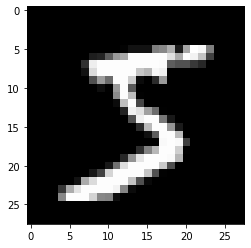

In [6]:
plt.imshow(xtr[0], cmap = 'gray')
# In order to overcome semantic gap, we convert 2D array of numbers to pixels.
# For that, we use matplotlib and import pyplot library as pp
# plt is used here to plot image out of array of numbers.

In [7]:
ytr[0]   # Gives '5' as shown in above image.

5

In [0]:
xtr = xtr.reshape(xtr.shape[0], xtr.shape[1] * xtr.shape[2])
xte = xte.reshape(xte.shape[0], xte.shape[1] * xte.shape[2])
# Flattening the images (i.e from 28 x 28 to 784)

In [9]:
xtr.shape, xte.shape, xtr[0].ndim, xte[0].ndim

((60000, 784), (10000, 784), 1, 1)

In [10]:
print("Training data:", xtr[0, 350:450], "Testing data:", xte[0, 350:450], sep = '\n')
# Checking the middle portion of data, both train and test data.

Training data:
[ 70   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  81 240 253 253 119  25   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  45 186 253 253 150  27
   0   0   0   0   0   0   0   0   0   0]
Testing data:
[  0   0   0  22 233 255  83   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 129 254 238  44   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  59 249 254  62   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 133 254 187   5
   0   0   0   0   0   0   0   0   0   0]


In [0]:
xtr = xtr.astype('float32')/255   # Scaling the pixel values in (0, 1) range
xte = xte.astype('float32')/255

In [12]:
print("Training data:", xtr[0, 350:450], "Testing data:", xte[0, 350:450], sep = '\n')

Training data:
[0.27450982 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.13725491 0.94509804 0.88235295 0.627451
 0.42352942 0.00392157 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.31764707 0.9411765  0.99215686 0.99215686 0.46666667
 0.09803922 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.1764706  0.7294118  0.99215686 0.99215686 0.5882353  0.10588235
 0.         0.         0.         0.         0.         0.
 0.         0.     

In [0]:
ytr_encoded = tcg(ytr)    # Converting a number into a vector of 0s and 1s i.e.
yte_encoded = tcg(yte)    # performing one hot encoding for multi-class classification

In [14]:
ytr_encoded[0], yte_encoded[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [15]:
model = Sequential()
model.add(Dense(input_dim = 784, units = 1024, activation = 'relu'))  # We're adding 1024 units i.e. 'neurons' into our neural network
# Activation function 'relu' is used here...
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
# Activation function 'relu' is used here...
# Note: Always end-up with no. of neurons as many as no. of outputs. i.e. 10 here, using 'softmax' activation function
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 'loss' always tells us how bad our predictions are...
#  metrics gives off how accurate our predictions are...

In [16]:
model.fit(xtr, ytr_encoded, validation_data = (xte, yte_encoded), epochs = 10, batch_size = 256)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 2s 41us/step - loss: 0.2293 - acc: 0.9329 - val_loss: 0.0971 - val_acc: 0.9710
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0787 - acc: 0.9762 - val_loss: 0.0797 - val_acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0485 - acc: 0.9846 - val_loss: 0.0634 - val_acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0687 - val_acc: 0.9789
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0223 - acc: 0.9928 - val_loss: 0.0747 - val_acc: 0.9772
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0202 - acc: 0.9930 - val_loss: 0.0617 - val_acc: 0.9814
Epoch 7/10
60000/60000 [==

In [17]:
# Now, decoding integers from target vectors
# Evaluation of testing data
y_dencode1 = []
for i in model.predict(xte[0:50]):
  y_dencode1.append(np.argmax(i))
print("Validation Accuracy:", accuracy_score(yte[0:50], y_dencode1) * 100, '%')
print("Confusion Matrix:", confusion_matrix(yte[0:50], y_dencode1), sep = '\n')

Validation Accuracy: 100.0 %
Confusion Matrix:
[[5 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 5]]


In [18]:
# Evaluation of training data
y_dencode2 = []
for i in model.predict(xtr[0:50]):
  y_dencode2.append(np.argmax(i))
print("Training Accuracy:", accuracy_score(ytr[0:50], y_dencode2) * 100, '%')
print("Confusion Matrix:", confusion_matrix(ytr[0:50], y_dencode2), sep = '\n')

Training Accuracy: 100.0 %
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 7]]
